In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi okuma
df = pd.read_csv('real_drug_dataset.csv')



### ⚠️ Metodoloji Notu: Veri Seti Yapısı ve Analiz Kapsamı

Bu projede kullanılan veri seti, **1.000 hasta kaydı** içermektedir. Veri seti; toplam **15 farklı ilaç**, **30 farklı yan etki** ve **5 farklı hastalık** (Condition) türünden oluşan konsantre bir yapıya sahiptir.

Analiz stratejisi olarak; veri setindeki çeşitlilik (cardinality) sınırlı olduğu için, herhangi bir "ilk 15" filtrelemesi yapılmasına gerek kalmamış, mevcut **tüm ilaç ve yan etkiler** analize dahil edilmiştir. Bu yaklaşım, veri setindeki tüm desenlerin (patterns) kayıpsız bir şekilde görselleştirilmesine olanak tanımıştır.

In [67]:
# --- SORU 1: Temel İstatistikler ---

# describe() fonksiyonu sayısal sütunların istatistiklerini verir.
# 'Patient_ID' istatistiksel bir anlam taşımadığı için (sadece kimlik no) onu hesaplamaya katmıyoruz.
# .T (Transpose) diyerek tabloyu yan çeviriyoruz ki okuması kolay olsun.

sayisal_istatistikler = df.drop(columns=['Patient_ID']).describe().T

print("Sayısal Değişkenlerin İstatistikleri:")
display(sayisal_istatistikler)

Sayısal Değişkenlerin İstatistikleri:


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.8570,18.114267,18.0,35.0,50.0,66.0,79.0
Dosage_mg,1000.0,352.6500,295.419617,50.0,100.0,250.0,500.0,850.0
Treatment_Duration_days,1000.0,32.3800,15.698090,5.0,19.0,32.0,46.0,59.0
Improvement_Score,1000.0,7.0152,1.425609,2.5,6.1,7.0,8.0,10.0


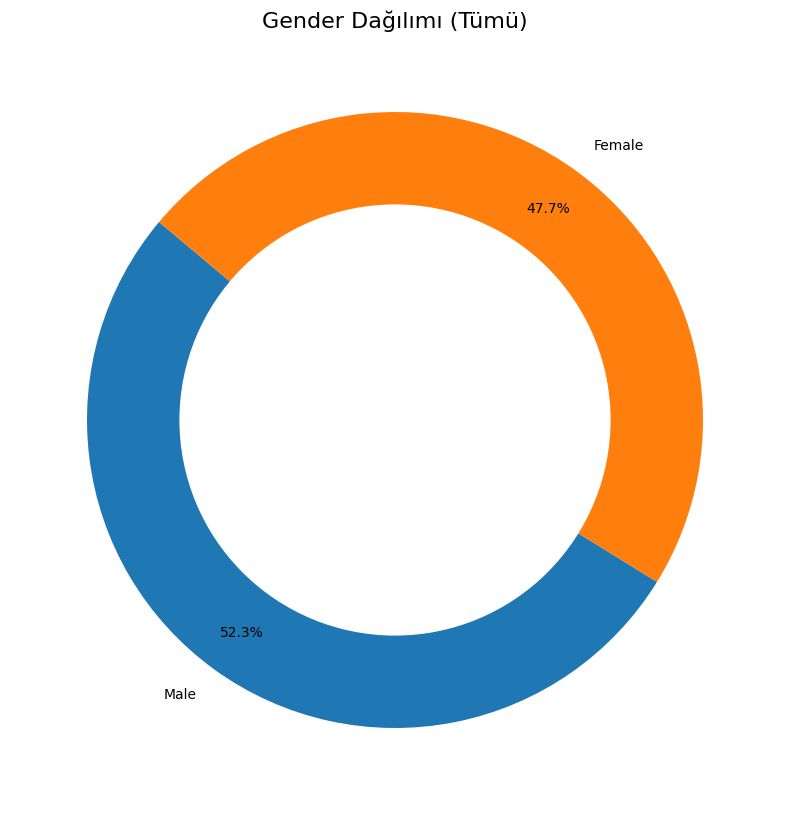

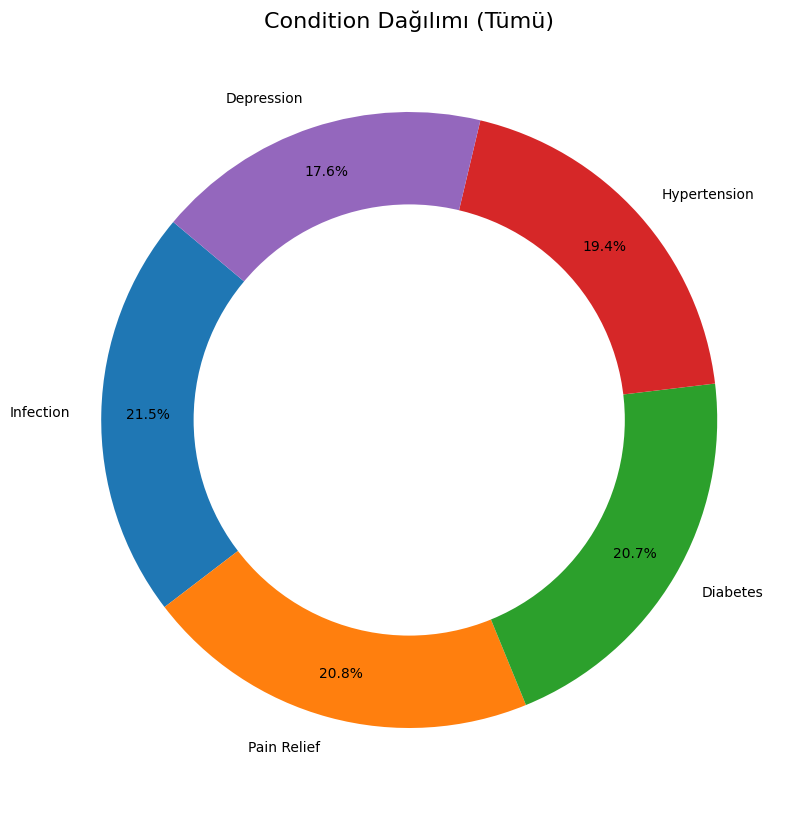

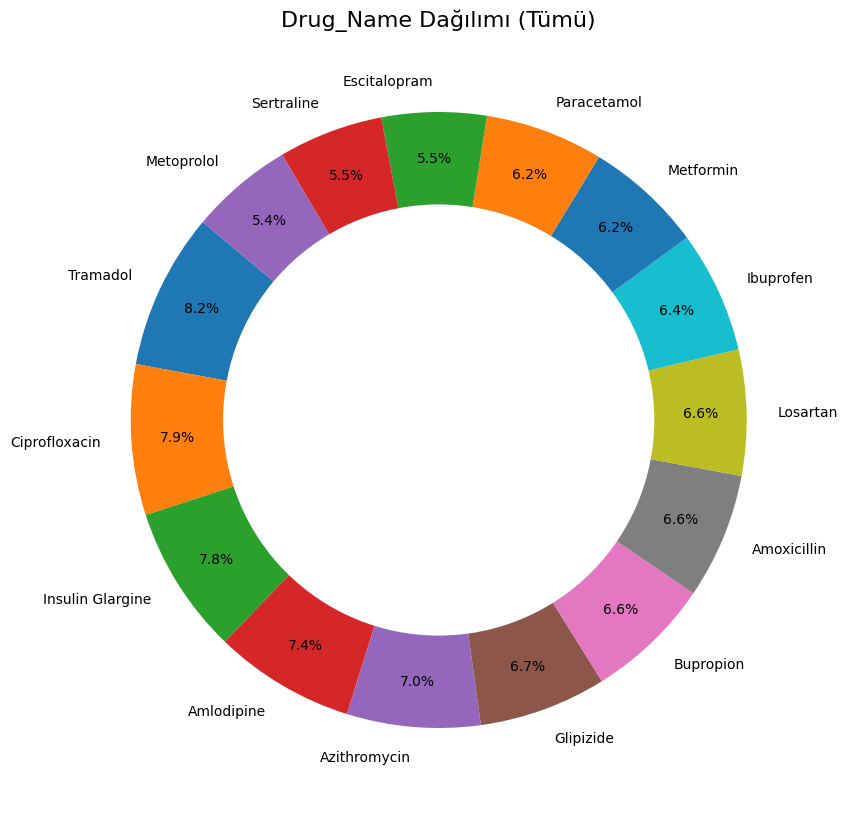

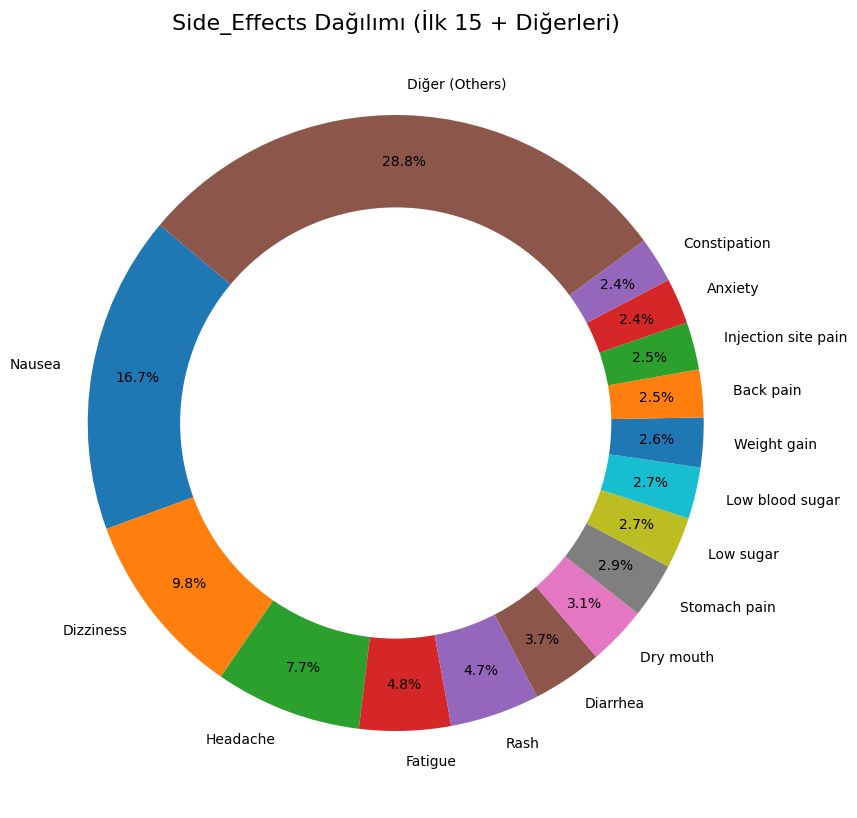

In [68]:
# --- SORU 2: Kategorik Sütunlar (Pie Chart - Akıllı Filtreleme) ---

kategorik_sutunlar = ['Gender', 'Condition', 'Drug_Name', 'Side_Effects']

for col in kategorik_sutunlar:
    plt.figure(figsize=(10, 10))
    
    # Veriyi say
    tum_veriler = df[col].value_counts()
    
    # EĞER kategori sayısı 15'ten fazlaysa:
    if len(tum_veriler) > 15:
        # İlk 15 taneyi al
        gosterilecek = tum_veriler.head(15)
        
        # Geriye kalanların hepsini topla ve 'Diğer' diye bir kategori yap
        diger_toplami = tum_veriler[15:].sum()
        
        # Yeni bir seri oluşturup 'Diğer'i ekle
        # (Pandas'ın yeni sürümlerinde append kalktığı için concat kullanıyoruz)
        diger_serisi = pd.Series({'Diğer (Others)': diger_toplami})
        son_veri = pd.concat([gosterilecek, diger_serisi])
        
        baslik = f"{col} Dağılımı (İlk 15 + Diğerleri)"
    
    # EĞER 15'ten azsa (Örn: Gender): Hepsini göster
    else:
        son_veri = tum_veriler
        baslik = f"{col} Dağılımı (Tümü)"
    
    # Grafiği Çiz
    plt.pie(
        son_veri, 
        labels=son_veri.index, 
        autopct='%1.1f%%', 
        startangle=140,
        labeldistance=1.1, # Yazıları biraz dışa alır
        pctdistance=0.85   # Yüzdeleri merkeze yaklaştırır
    )
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(baslik, fontsize=16)
    plt.show()

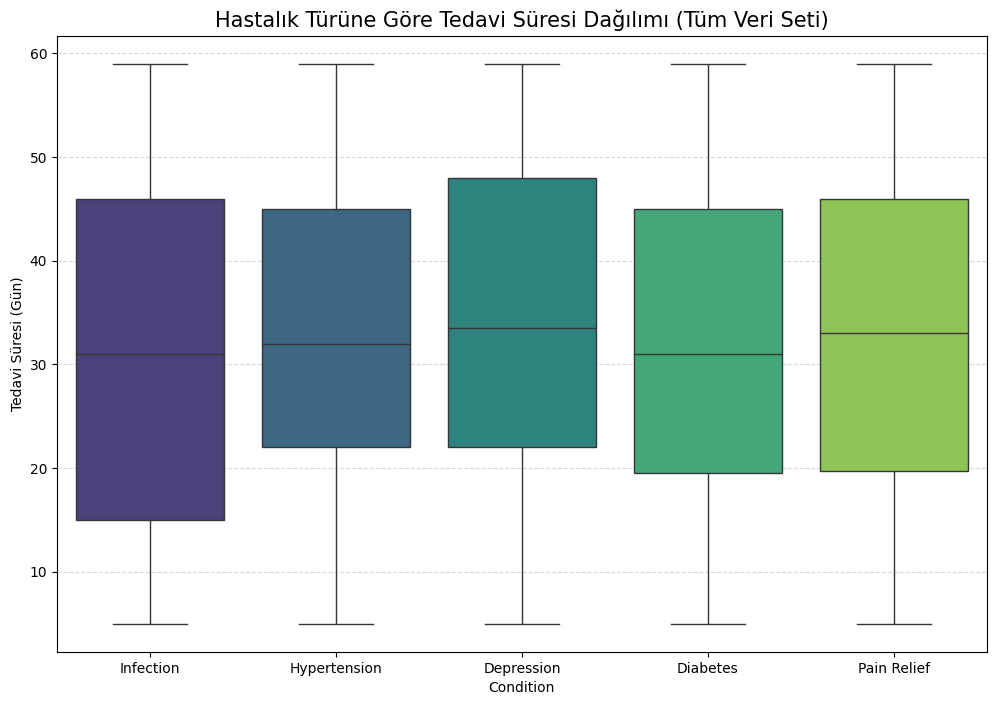

In [69]:
# --- SORU 3: Tüm Hastalıklar İçin Tedavi Süresi (Boxplot) ---

plt.figure(figsize=(12, 8))

sns.boxplot(
    x='Condition', 
    y='Treatment_Duration_days', 
    data=df, 
    palette="viridis", 
    hue='Condition', 
    legend=False
)

plt.title('Hastalık Türüne Göre Tedavi Süresi Dağılımı (Tüm Veri Seti)', fontsize=15)
plt.ylabel('Tedavi Süresi (Gün)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

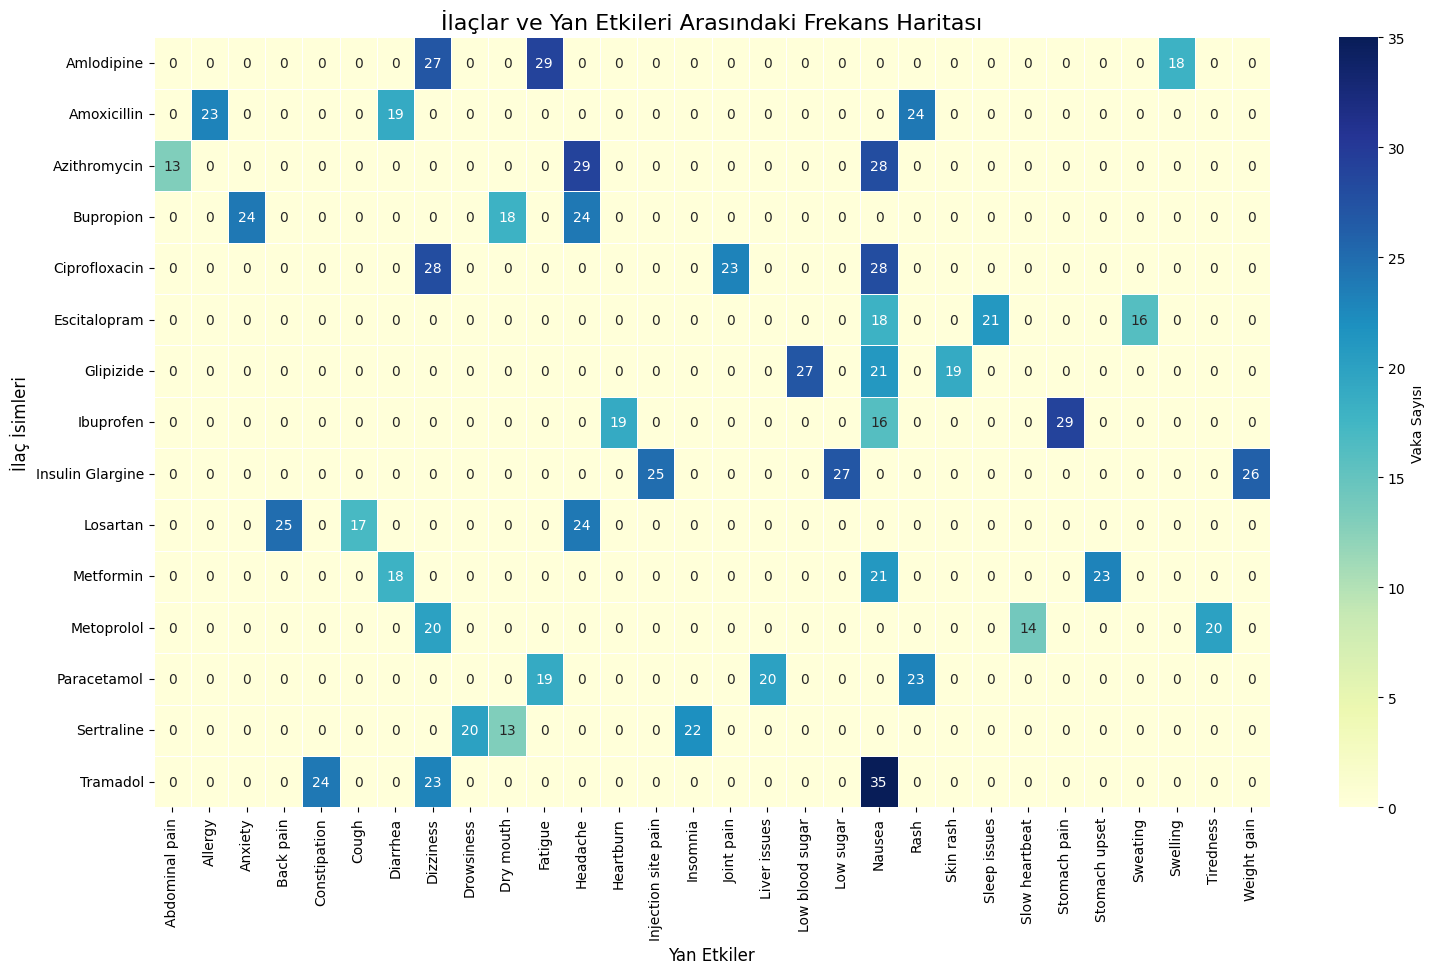

In [70]:
# --- SORU 4: İlaç ve Yan Etki Frekans Matrisi ---

plt.figure(figsize=(18, 10)) # Genişliği artırdık ki 30 yan etki sığsın

veri_tablosu = pd.crosstab(df['Drug_Name'], df['Side_Effects'])

sns.heatmap(
    veri_tablosu, 
    annot=True,    
    fmt='d',       
    cmap='YlGnBu', 
    linewidths=.5,
    cbar_kws={'label': 'Vaka Sayısı'}
)

plt.title('İlaçlar ve Yan Etkileri Arasındaki Frekans Haritası', fontsize=16)
plt.xlabel('Yan Etkiler', fontsize=12)
plt.ylabel('İlaç İsimleri', fontsize=12)
plt.xticks(rotation=90) # Yan etkiler dik yazılsın
plt.yticks(rotation=0)
plt.show()


### Soru 4: İlaç-Yan Etki Frekans Matrisi 

Bu analizde, alan bilgisinden (domain knowledge) bağımsız olarak, sadece veri setinin yapısal özellikleri ve istatistiksel dağılımları incelenmiştir.

**1. Matris Seyrekliği (Sparsity Analysis):**
Oluşturulan 15x30 boyutundaki frekans matrisinin büyük bir kısmının **0 (sıfır)** veya çok düşük değerlerden oluştuğu görülmektedir.
* **Analiz:** Veri matrisi "seyrek" (sparse) bir yapıdadır. Bu durum, değişkenler (ilaçlar ve yan etkiler) arasındaki ilişkinin rastgele olmadığını, aksine güçlü ve deterministik (belirli) bir korelasyona dayandığını gösterir. Her satır vektörü, sadece belirli sütun boyutlarında aktifleşmektedir.

**2. Birliktelik Kuralı ve Mod (Association Rule):**
Matris üzerindeki global maksimum değer, **Tramadol** satırı ile **Nausea** sütununun kesişiminde **35** olarak tespit edilmiştir.
* **Analiz:** İstatistiksel olarak bu ikili, veri setindeki en güçlü **"Birliktelik Kuralını"** (Association Rule) temsil eder. Koşullu olasılık açısından bakıldığında, Tramadol girdisi verildiğinde Nausea çıktısı oluşma olasılığı en yüksek olaydır.

**3. Veri Kalitesi ve Tutarsızlık Tespiti (Data Anomaly):**
Veri ön incelemesinde kritik bir etiketleme hatası tespit edilmiştir.
* X ekseninde hem **"Low blood sugar"** hem de **"Low sugar"** etiketleri bulunmaktadır.
* Matris dağılımında; **Glipizide** "Low blood sugar" (27) ile, **Insulin Glargine** ise "Low sugar" (27) ile eşleşmiştir.
* **Analiz:** İsim benzerliği ve dağılım paterni, bu iki değişkenin aslında aynı öznitelik (feature) olduğunu gösterir. Veri temizleme aşamasında bu sütunların birleştirilmesi (Feature Engineering), modelin boyutunu azaltacak (dimensionality reduction) ve varyansı düşürecektir.

**4. Varyans Analizi:**
* **Yüksek Varyans:** "Nausea" (Mide Bulantısı) sütunu, birçok farklı satırda yüksek değerler almıştır. Bu, değişkenin sınıflandırma gücünün (discriminative power) düşük olduğunu gösterir.
* **Düşük Varyans:** "Injection site pain" sütunu sadece tek bir satırda değer almıştır. Bu, sınıflandırma algoritmaları için yüksek bilgi kazancı sağlayan "Mükemmel Ayırıcı" bir özniteliktir.

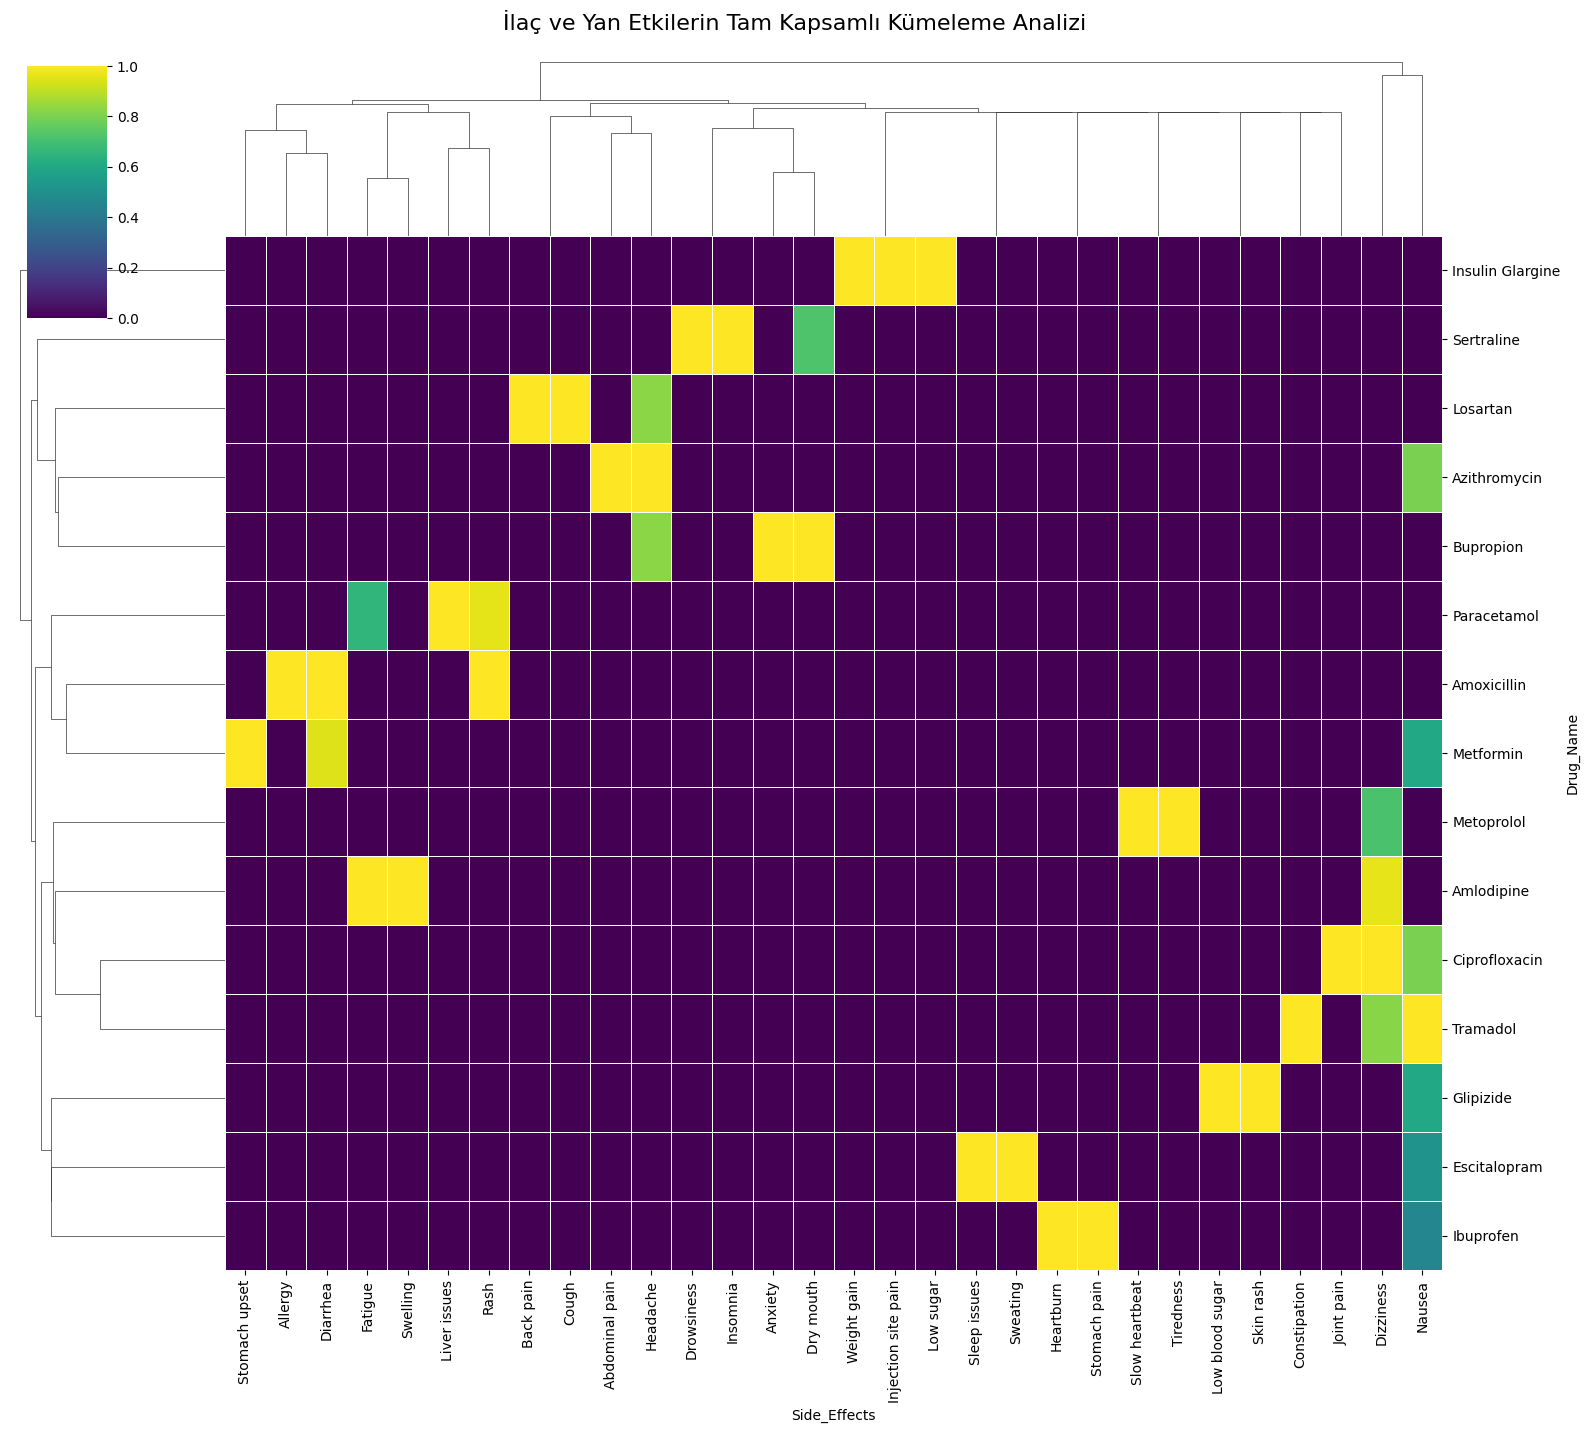

In [71]:
# --- SORU 5: Hiyerarşik Kümeleme---

# Veriyi hazırlıyoruz 
cluster_data = pd.crosstab(df['Drug_Name'], df['Side_Effects'])

# Grafiği çiziyoruz
g = sns.clustermap(
    cluster_data, 
    cmap='viridis', 
    standard_scale=1, # Ölçekleme önemli
    figsize=(16, 14), # Boyutu büyük tutalım
    linewidths=.5,
    dendrogram_ratio=(.15, .15) # Ağaçların kapladığı alan oranı
)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # Alt yazıları dik çevir
g.fig.suptitle('İlaç ve Yan Etkilerin Tam Kapsamlı Kümeleme Analizi', y=1.02, fontsize=16)
plt.show()

### Soru 5: Hiyerarşik Kümeleme (Clustermap) Yapısal Analizi

Bu grafikte, **Hiyerarşik Kümeleme (Hierarchical Clustering)** algoritmasının, veri setindeki gizli yapıları (latent structures) nasıl ortaya çıkardığı analiz edilmiştir.

**1. Aykırı Gözlem Tespiti (Outlier Detection):**
Sol taraftaki dendrogram (ağaç yapısı) incelendiğinde, en üstteki satırın (**Insulin Glargine**) diğer 14 satırdan çok daha yüksek bir birleşme mesafesine (Euclidean distance) sahip olduğu görülmektedir.
* **Analiz:** Algoritma, bu gözlemi istatistiksel bir **"Outlier" (Aykırı Değer)** olarak ayrıştırmıştır. Bunun nedeni, bu satırın öznitelik vektörünün (Feature Vector), diğer satırlarla ortogonal (dik/benzersiz) bir yapıda olmasıdır. Diğer vektörlerde 0 olan boyutlar, bu vektörde maksimum değerdedir.

**2. Kümeleme Benzerliği (Cluster Cohesion):**
Algoritma, **Amoxicillin** ve **Metformin** satırlarını en alt seviyede (en kısa mesafede) birleştirmiştir.
* **Analiz:** Bu iki gözlem, matematiksel olarak birbirine "en yakın" vektörlerdir. Sarı renkli (yüksek değerli) hücrelerin konumlarına bakıldığında, her ikisinin de aynı sütunlarda ("Diarrhea", "Rash") pik yaptığı görülür. Algoritma için bu iki ilaç, yan etki uzayında birbirinin en yakın komşusudur (Nearest Neighbor).

**3. Çoklu Bağlantı (Multicollinearity):**
Grafiğin üst kısmındaki dendrogram, sütunların (yan etkilerin) benzerliğini gösterir. "Injection site pain", "Low sugar" ve "Weight gain" sütunları birbirine en yakın dallarda birleşmiştir.
* **Analiz:** Bu durum, **Multicollinearity** (Çoklu Bağlantı) varlığını işaret eder. Yani bu üç değişken veri setinde bağımsız değildir, birlikte hareket etmektedir. Boyut indirgeme (PCA vb.) yapılmak istenirse, bu üç sütun tek bir bileşene (Principal Component) indirgenebilir.

**Sonuç:**
Analiz, veri setinin temizlenmeye (Low sugar hatası) ve boyut indirgemeye (benzer özelliklerin birleştirilmesi) ihtiyacı olduğunu göstermektedir. Matris üzerinde oluşan belirgin bloklar (Cluster Blocks), verinin kümelenmeye uygun yapıda olduğunu kanıtlar.

In [72]:
# --- SORU 6: Yaş ve İyileşme Skoru Arasındaki Korelasyon ---
# Amaç: Yaş (Age) ile İyileşme (Improvement_Score) arasında nasıl bir ilişki var?
# corr() fonksiyonu -1 ile +1 arasında bir değer döndürür.
korelasyon = df['Age'].corr(df['Improvement_Score'])

print(f"SORU 6 - Korelasyon Katsayısı: {korelasyon:.4f}")

SORU 6 - Korelasyon Katsayısı: 0.0105


### Soru 6: Korelasyon Yorumu

**Age** (Bağımsız Değişken) ile **Improvement_Score** (Hedef Değişken) arasındaki Pearson korelasyon katsayısı **$r = 0.0105$** olarak hesaplanmıştır.

**1. Öznitelik Önemi (Feature Importance) Değerlendirmesi:**
Hesaplanan katsayı 0'a ihmal edilebilir düzeyde yakındır. Bu durum, "Yaş" özniteliğinin, hedef değişken olan İyileşme Skorunu açıklamada **düşük bilgi kazancına (low information gain)** sahip olduğunu gösterir. Olası bir regresyon modelinde, Yaş değişkeninin katsayısı (coefficient) istatistiksel olarak anlamsız olacaktır.

**2. Doğrusallık Varsayımı (Linearity Assumption):**
Pearson katsayısı yalnızca **doğrusal** ilişkileri ölçer. Sonucun 0 çıkması, Yaş ile İyileşme arasında lineer bir bağ olmadığını kesinleştirir.
* *Analitik Not:* Bu sonuç, aralarında *doğrusal olmayan* (non-linear) bir ilişki olma ihtimalini elemez. Ancak mevcut veri dağılımında, yaşın artması veya azalması skoru lineer olarak etkilememektedir.

**3. Gürültü vs. Sinyal (Noise vs Signal):**
Veri analitiği açısından bakıldığında, iyileşme skorunu tahmin etmeye yönelik bir model geliştirilecekse, "Yaş" değişkeni bu haliyle model için **sinyal (bilgi)** değil, **gürültü** yaratma potansiyeline sahiptir.

**Sonuç:**
Veri odaklı karar verme sürecinde; hastanın iyileşme potansiyelini tahmin etmek için "Yaş" parametresi ayırt edici bir faktör olarak kullanılamaz. Analiz, odak noktasının demografik verilerden (yaş, cinsiyet) ziyade klinik verilere (dozaj, hastalık türü) kaydırılması gerektiğini işaret etmektedir.

In [73]:
# --- SORU 7: Cinsiyete Göre Hastalık Oranları (Normalize) ---
# Amaç: Kadınların ve Erkeklerin hastalık dağılımlarını oran olarak (toplam 1 olacak şekilde) görmek.
# normalize='index' parametresi satır bazında yüzde hesabı yapar.
cinsiyet_hastalik_oranlari = pd.crosstab(df['Gender'], df['Condition'], normalize='index')

print("SORU 7 - Cinsiyete Göre Hastalık Olasılık Tablosu:")
display(cinsiyet_hastalik_oranlari)
print("-" * 50)

SORU 7 - Cinsiyete Göre Hastalık Olasılık Tablosu:


Condition,Depression,Diabetes,Hypertension,Infection,Pain Relief
Gender,,,,,
Female,0.176101,0.213836,0.178197,0.238994,0.192872
Male,0.175908,0.200765,0.208413,0.193117,0.221797


--------------------------------------------------


In [74]:
# --- SORU 7: Cinsiyete Göre Hastalık Oranları (Normalize) ---
# Amaç: Kadınların ve Erkeklerin hastalık dağılımlarını oran olarak (toplam 1 olacak şekilde) görmek.
# normalize='index' parametresi satır bazında yüzde hesabı yapar.
cinsiyet_hastalik_oranlari = pd.crosstab(df['Gender'], df['Condition'], normalize='index')

print("SORU 7 - Cinsiyete Göre Hastalık Olasılık Tablosu:")
display(cinsiyet_hastalik_oranlari)
print("-" * 50)

SORU 7 - Cinsiyete Göre Hastalık Olasılık Tablosu:


Condition,Depression,Diabetes,Hypertension,Infection,Pain Relief
Gender,,,,,
Female,0.176101,0.213836,0.178197,0.238994,0.192872
Male,0.175908,0.200765,0.208413,0.193117,0.221797


--------------------------------------------------


In [75]:
# --- SORU 9: Metoprolol Kullananlarda Baş Dönmesi Olasılığı ---
# Amaç: P(Dizziness | Metoprolol) hesaplamak.

# İlaç ismini belirleyelim (Veri setinde tam eşleşme lazım)
hedef_ilac = "Metoprolol"

# 1. Metoprolol kullanan herkesi filtrele
metoprolol_kullananlar = df[df['Drug_Name'] == hedef_ilac]

# 2. Bunların içinden sadece başı dönenleri filtrele
metoprolol_ve_dizziness = metoprolol_kullananlar[metoprolol_kullananlar['Side_Effects'] == 'Dizziness']

# 3. Olasılık hesabı
toplam_kullanici = len(metoprolol_kullananlar)
bas_donmesi_sayisi = len(metoprolol_ve_dizziness)

print(f"SORU 9 - {hedef_ilac} Analizi:")
if toplam_kullanici > 0:
    olasilik = bas_donmesi_sayisi / toplam_kullanici
    print(f"Toplam {toplam_kullanici} kullanıcıdan {bas_donmesi_sayisi} tanesinde baş dönmesi görüldü.")
    print(f"SONUÇ: Metoprolol için Dizziness olasılığı: %{olasilik*100:.2f}")
else:
    print(f"HATA: Veri setinde '{hedef_ilac}' isimli ilaç bulunamadı.")

SORU 9 - Metoprolol Analizi:
Toplam 54 kullanıcıdan 20 tanesinde baş dönmesi görüldü.
SONUÇ: Metoprolol için Dizziness olasılığı: %37.04
